# Task 2: Score Prediction using Linear Regression

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#import data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


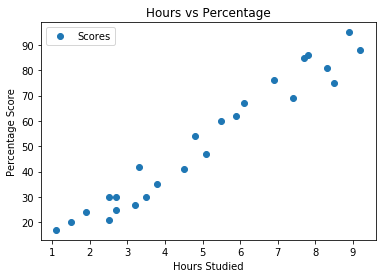

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
X = np.array(s_data[["Hours"]])  
y = np.array(s_data["Scores"])

In [11]:
#Splitting data into train data and test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [12]:
#Training Data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9515510725211553


In [15]:
print("Intercept: ", model.intercept_)

Intercept:  2.0181600414346974


In [16]:
print("Slope:",model.coef_)

Slope: [9.91065648]


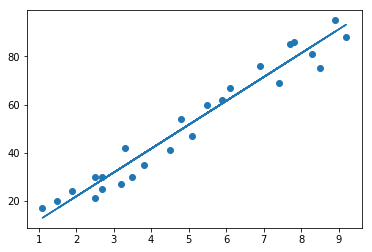

In [17]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [18]:
#Predicting Test Data
y_pred = model.predict(X_test)
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
#Prediction on other data
hours = [[9.25]]
pred = model.predict(hours)
print("Predicted Score: {}".format(pred[0]))

Predicted Score: 93.69173248737535


In [26]:
#Evaluating the Model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
